In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import random

In [2]:
pathToData = "../input/cat-and-dog/training_set/training_set"

yLabels = []
listImg = []
for folder in os.listdir(pathToData):
    pathFolder = os.path.join(pathToData, folder)
    for image in os.listdir(pathFolder):
        if image.split('.')[0] != "_DS_Store":
            imgPath = os.path.join(pathFolder, image)
            img = load_img(imgPath, target_size=(224,224))
            img = img_to_array(img)
            img = np.expand_dims(img, 0)
            listImg.append(img)
            if image.split(".")[0] == "cat":
                yLabels.append(0)
            if image.split(".")[0] == "dog":
                yLabels.append(1)


In [3]:
listImg = np.vstack(listImg)

In [4]:
print(listImg.shape)

(8005, 224, 224, 3)


In [5]:
yLabels = np.array(yLabels)

In [6]:
Ylabels = np_utils.to_categorical(yLabels)

In [7]:
Ylabels.shape

(8005, 2)

In [8]:
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

val_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1) 

In [9]:
dataOutVGG = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3),classes=Ylabels.shape[1])

2022-03-18 08:45:52.612551: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 08:45:52.721812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 08:45:52.722477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 08:45:52.723575: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [10]:
fullModel = Sequential()
fullModel.add(dataOutVGG)
fullModel.add(Flatten())
fullModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [11]:
fullModel.add(Dense(1024, activation='relu', input_dim=25088))
fullModel.add(Dense(512, activation='relu'))
fullModel.add(Dense(256, activation='relu'))
fullModel.add(Dense(128, activation='relu'))
fullModel.add(Dense(64, activation='relu'))
fullModel.add(Dense(2, activation='sigmoid'))

In [12]:
fullModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8

In [13]:
pathToData = "../input/cat-and-dog/test_set/test_set"

yLabel = []
listImage = []
for folder in os.listdir(pathToData):
    pathFolder = os.path.join(pathToData, folder)
    for image in os.listdir(pathFolder):
        if image.split('.')[0] != "_DS_Store":
            imgPath = os.path.join(pathFolder, image)
            img = load_img(imgPath, target_size=(224,224))
            img = img_to_array(img)
            img = np.expand_dims(img, 0)
            listImage.append(img)
            if image.split(".")[0] == "cat":
                yLabel.append(0)
            if image.split(".")[0] == "dog":
                yLabel.append(1)


In [14]:
sgd = SGD(0.001)
fullModel.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
listImage = np.vstack(listImage)
yLabel = np.array(yLabel)
Ylabel = np_utils.to_categorical(yLabel)

In [16]:
listImage.shape

(2023, 224, 224, 3)

In [17]:
Ylabel.shape

(2023, 2)

In [19]:
fullModel.fit_generator(train_generator.flow(listImg, Ylabels, batch_size=50), epochs=30,validation_data=val_generator.flow(listImage, yLabel, batch_size=50), verbose=1)

Epoch 1/30
161/161 [==============================] - ETA: 0s - loss: 0.0737 - accuracy: 0.9715

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1330 test_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1313 run_step  **
        outputs = model.test_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1270 test_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [20]:
pathToImgtest = "../input/dogandcatdatatest/dog.jpg"

In [21]:
imgTest = load_img(pathToImgtest, target_size=(224,224))

In [22]:
imgTest = img_to_array(imgTest)

In [23]:
imgTest.shape

(224, 224, 3)

In [24]:
labels = ["cat", "dog"]

Text(0.5, 0, 'dog')

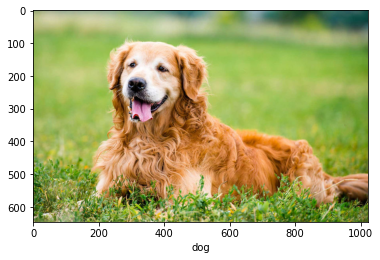

In [25]:
imgDisplay = load_img(pathToImgtest)
plt.imshow(imgDisplay)
pred = np.argmax(fullModel.predict(imgTest.reshape(1,224,224,3)))
plt.xlabel(labels[pred])

In [ ]:
print(Ylabel[0])
print(np.argmax(fullModel.predict(listImage[0].reshape(1,224,224,3))))

In [ ]:
imgList = []
for folder in os.listdir(pathToData):
    pathFolder = os.path.join(pathToData, folder)
    for img in os.listdir(pathFolder):
        if img.split('.')[0] != "_DS_Store":
            pathImg = os.path.join(pathFolder, img)
            image = load_img(pathImg)
            imgList.append(image)
        
labels = ["cat", "dog"]



In [ ]:
plt.imshow(imgList[1500])
plt.xlabel(labels[(np.argmax(fullModel.predict(listImage[1500].reshape(1,224,224,3))))])